In [ ]:
#Connect Drive and Import Packages
from google.colab import drive
drive.mount('/content/drive')
train_dataset_path = '/content/drive/MyDrive/4321 Colab Notebooks/Train.csv'
test_dataset_path = '/content/drive/MyDrive/4321 Colab Notebooks/Test.csv'

In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

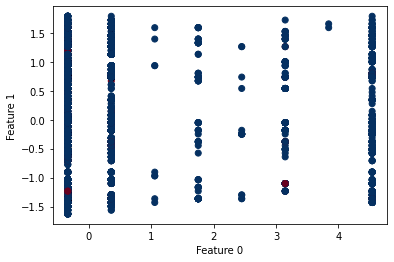

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdBu');
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

In [ ]:
# Train NN
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
def plot_decision_boundary_nn(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', lw=0)
    y_pred = model.predict(X_test)

    ax.scatter(X[:, 0], X[:, 1], c=y,  alpha=1,cmap='viridis',label="df")
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    return fig, ax

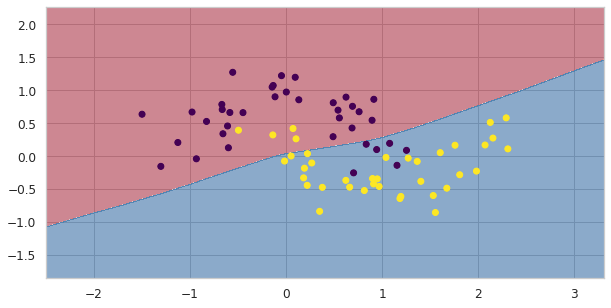

In [ ]:
plot_decision_boundary_nn(X_train, y_train, mlp, cmap='RdBu' );

In [ ]:
print(f'Accuracy of classifier on training set: {(mlp.score(X_train, y_train)):.2f}')
print(f'Accuracy of classifier on test set: {(mlp.score(X_test, y_test)):.2f}')

Accuracy of classifier on training set: 0.98
Accuracy of classifier on test set: 0.98


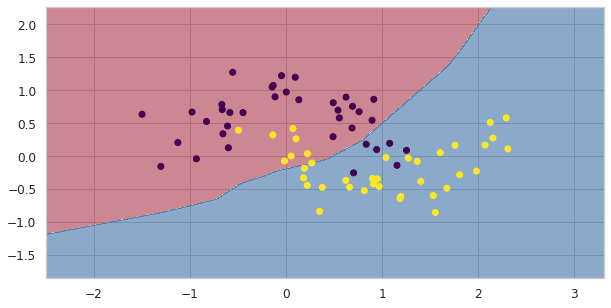

In [ ]:
plot_decision_boundary_nn(X_train, y_train, mlp, cmap='RdBu' );

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100) ).fit(X_train, y_train)

In [ ]:
print(f'Accuracy of classifier on training set: {(mlp.score(X_train, y_train)):.2f}')
print(f'Accuracy of classifier on test set: {(mlp.score(X_test, y_test)):.2f}')

Accuracy of classifier on training set: 0.95
Accuracy of classifier on test set: 0.88


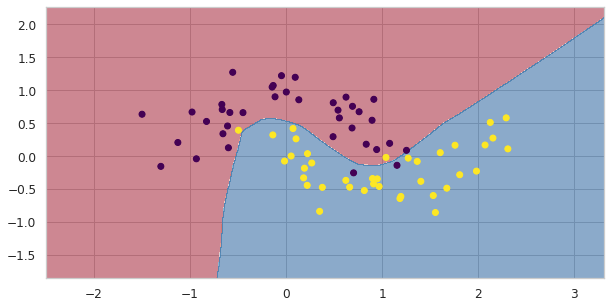

In [ ]:
plot_decision_boundary_nn(X_train, y_train, mlp, cmap='RdBu' );

### L2 Penalty
- We can conrol the complexity of the NN.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100), solver='lbfgs').fit(X_train, y_train)

In [ ]:
print(f'Accuracy of classifier on training set: {(mlp.score(X_train, y_train)):.2f}')
print(f'Accuracy of classifier on test set: {(mlp.score(X_test, y_test)):.2f}')

Accuracy of classifier on training set: 1.00
Accuracy of classifier on test set: 0.88


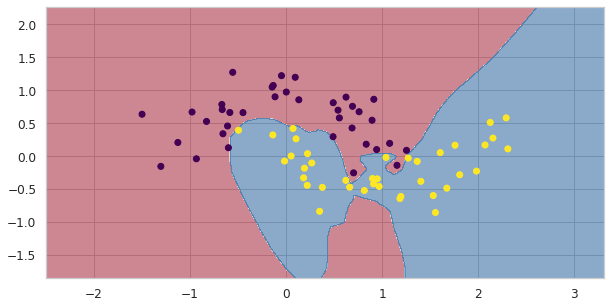

In [ ]:
plot_decision_boundary_nn(X_train, y_train, mlp, cmap='RdBu' );

### CYBERNN

In [ ]:
# Setup The Notebook
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 10]})
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Connect Drive and Import Packages
#Drop All Null Rows and Display Clean Data
from google.colab import drive
drive.mount('/content/drive')
train_dataset_path = '/content/drive/MyDrive/4321 Colab Notebooks/Train.csv'
rawdf = pd.read_csv(train_dataset_path)
rawdf = rawdf.dropna()
rawdf.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MALICIOUS_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [ ]:
X = rawdf.drop(columns=['MALICIOUS_OFFENSE','INCIDENT_ID','DATE'])
y = rawdf['MALICIOUS_OFFENSE']
X

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,1,47,48,7,3,15,10,1,5,1,174,0.0,98,29,34
23852,0,33,32,2,1,5,6,0,5,1,174,0.0,112,29,43
23853,0,25,25,9,0,3,5,1,6,1,174,0.0,10,29,18
23854,0,39,39,6,5,2,7,1,6,1,127,0.0,112,103,43


In [ ]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## GridSearch

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=100)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100) ).fit(X_train, y_train)

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,50,20)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(mlp_gs, parameter_space, cv=3)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [ ]:
clf.best_params_

{'activation': 'tanh', 'hidden_layer_sizes': (10, 30, 10), 'solver': 'adam'}

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80       214
           1       0.99      1.00      0.99      4521

    accuracy                           0.98      4735
   macro avg       0.94      0.87      0.90      4735
weighted avg       0.98      0.98      0.98      4735



In [ ]:
print(f'Accuracy of classifier on training set: {(clf.score(X_train, y_train)):.2f}')
print(f'Accuracy of classifier on test set: {(clf.score(X_test, y_test)):.2f}')

Accuracy of classifier on training set: 0.99
Accuracy of classifier on test set: 0.98


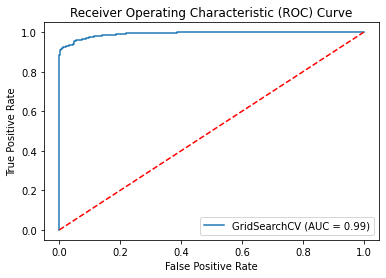

In [ ]:
from sklearn import metrics 
# Plot Receiver operating characteristic (ROC) curve.
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()  